## Las librerías _matplotlib_ y _plotly_

Para el conjunto de datos de apps de Google Play 'googleplaystore.csv':

- Realizar un gráfico histograma de la variable "Rating" de las apps
- Realizar un diagrama de barras de la variable "Category" de las apps
- Realizar un gráfico de dispersión de "Rating" vs "Reviews"
- (OPCIONAL) Realizar otro gráfico de los vistos anteriormente utilizando otras variables del dataset.

### Realizar un gráfico histograma de la variable "Rating" de las apps

In [1]:
import pandas as pd

dataset = pd.read_csv('../../data/app_store_transformed.csv')

Text(0, 0.5, 'Frecuencia')

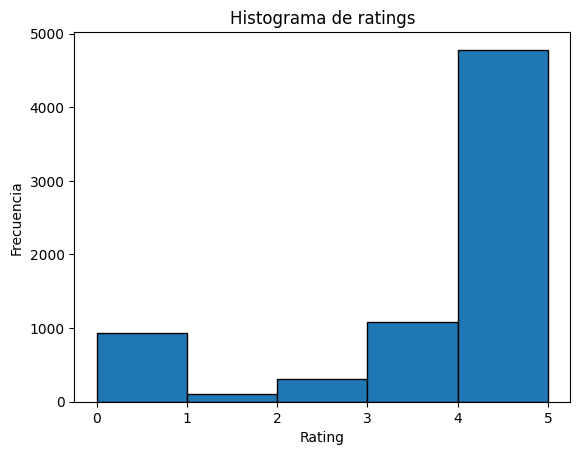

In [2]:
import matplotlib.pyplot as plt

# Calculo de los intervalos (se podria hacer a mano)
min_rating = int(dataset['Rating'].min())
max_rating = int(dataset['Rating'].max())
interval = [i for i in range(min_rating, max_rating + 1)]

# Creacion del histograma
plt.hist(
    dataset['Rating'],
    bins = interval,
    edgecolor = 'black',
)

# Decoracion del histograma
plt.title('Histograma de ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')

### Realizar un diagrama de barras de la variable "Category" de las apps

Text(0, 0.5, 'Categoria')

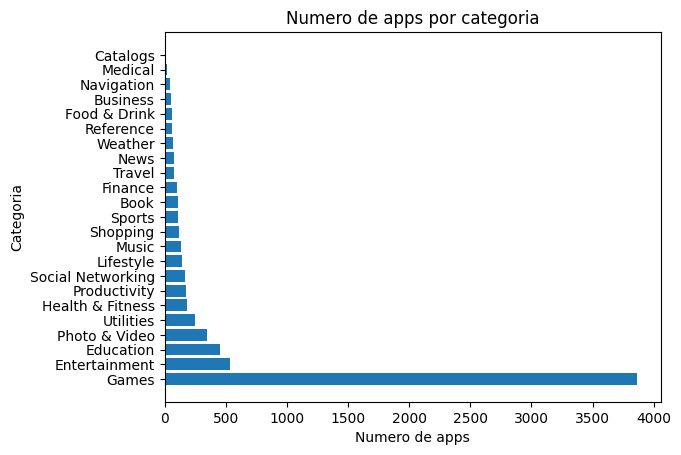

In [3]:
# Creacion de la figura
# * Debe ser barh en vez de bar para permitir que se lean las categorias
plt.barh(
    dataset['Category'].value_counts().keys(),
    dataset['Category'].value_counts().values,
)

# Decoracion de la figura
plt.title('Numero de apps por categoria')
plt.xlabel('Numero de apps')
plt.ylabel('Categoria')

### Realizar un gráfico de dispersión de "Rating" vs "Reviews"

Text(0, 0.5, 'Reviews')

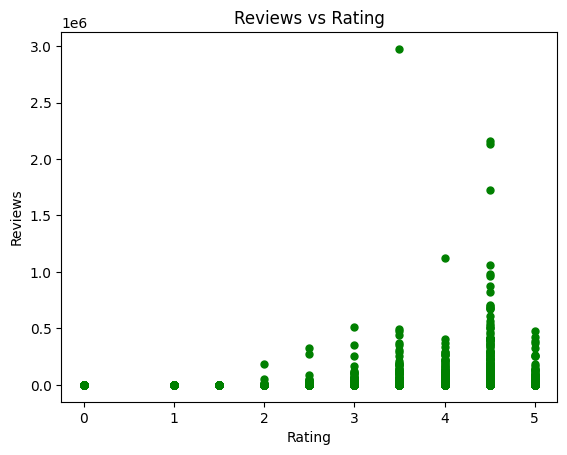

In [4]:
# Obtener los valores de las columnas
rating_values = dataset['Rating'].tolist()
reviews_values = dataset['Reviews'].tolist()

# Creación de la figura
plt.scatter(
    rating_values,
    reviews_values,
    c = 'green',
    marker = '.',
    s = 100
)

# Decoracion de la figura
plt.title('Reviews vs Rating')
plt.xlabel('Rating')
plt.ylabel('Reviews')

### Realizar otro gráfico de los vistos anteriormente utilizando otras variables del dataset.

[]

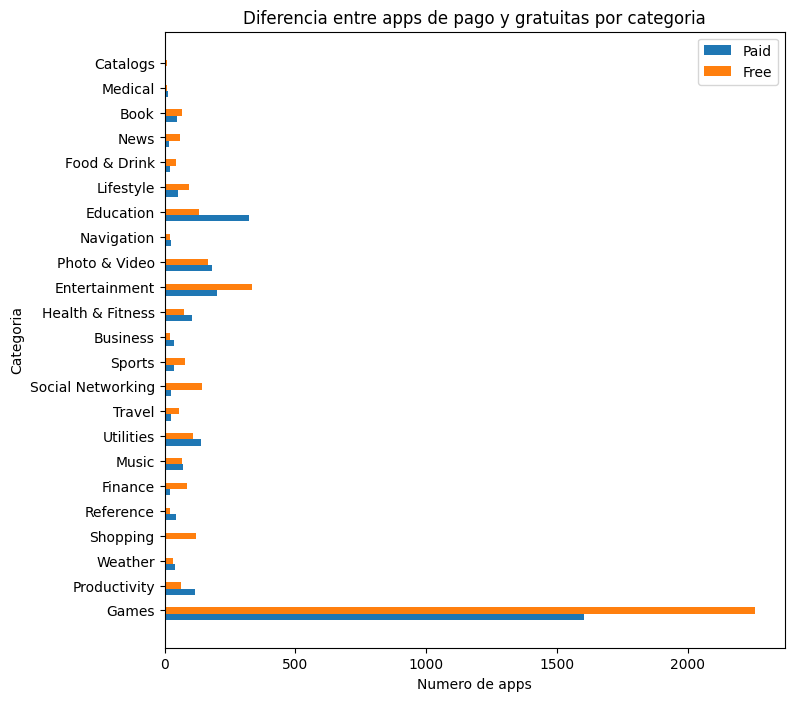

In [7]:
import numpy as np

CHART_SIZE = 8

# Get for each category the number of Paid and Free apps
types_per_category = dataset.groupby('Category')['Type'].value_counts()

categories = dataset['Category'].unique()

paid_apps = types_per_category.loc[categories, 'Paid'].tolist()
free_apps = types_per_category.loc[categories, 'Free'].tolist()

fig, ax = plt.subplots()

# Size of the chart
fig.set_size_inches(CHART_SIZE, CHART_SIZE)

x = np.arange(len(categories))
width = 0.25

# Barras de pago
rects = ax.barh(
    x,
    paid_apps,
    width,
    label = 'Paid'
)

# Barras gratuitas
rects = ax.barh(
    x + width,
    free_apps,
    width,
    label = 'Free'
)

# Decoracion de la figura
ax.set_title('Diferencia entre apps de pago y gratuitas por categoria')
ax.set_xlabel('Numero de apps')
ax.set_ylabel('Categoria')
ax.legend()
ax.set_yticks(x + width, categories)

plt.plot()